# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 6
# Reg-Logistic Regression, ROC, and Data Imputation

**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- Do not include your name(s) in the notebook if you are submitting as a group. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

---

Your partner's name (if you submit separately):

Enrollment Status (109A, 121A, 209A, or E109A):

Import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import seaborn.apionly as sns

/Users/yijunshen/anaconda3/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## Automated Breast Cancer Detection

In this homework, we will consider the problem of early breast cancer detection from X-ray images. Specifically, given a candidate region of interest (ROI) from an X-ray image of a patient's breast, the goal is to predict if the region corresponds to a malignant tumor (label 1) or is normal (label 0). The training and test data sets for this problem is provided in the file `hw6_dataset.csv`. Each row in these files corresponds to a ROI in a patient's X-ray, with columns 1-117 containing features computed using standard image processing algorithms. The last column contains the class label, and is based on a radiologist's opinion or a biopsy. This data was obtained from the KDD Cup 2008 challenge.

The data set contain a total of 69,098 candidate ROIs, of which only 409 are malignant, while the remaining are all normal. 

*Note*: be careful of reading/treating column names and row names in this data set.

## Question 1: Beyond Classification Accuracy


0.  Split the data set into a training set and a testing set.  The training set should be 75% of the original data set, and the testing set 25%.  Use `np.random.seed(9001)`.

1. Fit a logistic regression classifier to the training set and report the  accuracy of the classifier on the test set. You should use $L_2$ regularization in logistic regression, with the regularization parameter tuned using cross-validation. 
    1. How does the fitted model compare with a classifier that predicts 'normal' (label 0) on all patients? 
    2. Do you think the difference in the classification accuracies are large enough to declare logistic regression as a better classifier than the all 0's classifier? Why or why not?
    
For applications with imbalanced class labels, in this case when there are many more healthy subjects ($Y=0$) than those with cancer ($Y=1$), the classification accuracy may not be the best metric to evaluate a classifier's performance. As an alternative, we could analyze the confusion table for the classifier. 

<ol start="3">
<li> Compute the confusion table for both the fitted classifier and the classifier that predicts all 0's.</li>
<li> Using the entries of the confusion table compute the *true positive rate* and the *true negative rate* for the two classifiers. Explain what these evaluation metrics mean for the specific task of cancer detection. Based on the observed metrics, comment on whether the fitted model is better than the all 0's classifier.</li>
<li> What is the *false positive rate* of the fitted classifier, and how is it related to its true positive and true negative rate? Why is a classifier with high false positive rate undesirable for a cancer detection task?</li>
</ol>
*Hint:* You may use the `metrics.confusion_matrix` function to compute the confusion matrix for a classification model.

In [2]:
np.random.seed(9001)
df = pd.read_csv('hw6_dataset.csv')
df.head()

,-1.439999999999999891e-01,-1.429999999999999882e-01,-1.160000000000000059e-01,-1.029999999999999943e-01,2.260000000000000064e-01,2.099999999999999922e-01,-9.799999999999999822e-01,-7.800000000000000266e-01,-4.739999999999999769e-01,-4.470000000000000084e-01,...,9.250000000000000444e-01,5.160000000000000142e-01,3.439999999999999725e-01,9.060000000000000275e-01,-1.129999999999999893e+00,-5.520000000000000462e-01,5.530000000000000471e-01,-4.169999999999999818e-01,2.560000000000000053e-01,0.000000000000000000e+00
0,-0.01100,0.138,-0.2230,-0.1730,0.188,0.284,-0.0522,-0.256,0.129,0.427,...,-0.593,0.452,0.00785,-0.533,-0.0789,0.705,0.906,0.216,-0.0723,0.0
1,0.21200,-0.313,0.2660,0.2320,-1.190,-1.150,-1.8100,-1.560,-1.250,-1.200,...,-0.816,1.570,0.39400,1.340,-1.1800,-2.700,-0.926,-2.650,-0.0447,0.0
2,0.21500,-0.184,0.0274,0.0494,0.443,0.463,-1.0500,-0.941,-0.531,-0.394,...,0.634,0.111,0.37100,0.859,-0.9930,-0.492,0.363,0.326,-0.0528,0.0
3,0.27900,-0.197,0.1270,0.0973,-0.213,-0.150,-1.3200,-0.994,-1.110,-1.090,...,-0.640,0.485,0.29500,0.403,-1.1200,-0.343,0.468,-0.820,0.4350,0.0
4,0.00922,-0.138,0.1690,0.1540,-0.391,-0.397,-1.6900,-1.450,-0.546,-0.527,...,-0.277,0.699,0.37100,0.481,-1.0600,-0.526,0.550,-0.284,0.1550,0.0


In [3]:
df.describe()

,-1.439999999999999891e-01,-1.429999999999999882e-01,-1.160000000000000059e-01,-1.029999999999999943e-01,2.260000000000000064e-01,2.099999999999999922e-01,-9.799999999999999822e-01,-7.800000000000000266e-01,-4.739999999999999769e-01,-4.470000000000000084e-01,...,9.250000000000000444e-01,5.160000000000000142e-01,3.439999999999999725e-01,9.060000000000000275e-01,-1.129999999999999893e+00,-5.520000000000000462e-01,5.530000000000000471e-01,-4.169999999999999818e-01,2.560000000000000053e-01,0.000000000000000000e+00
count,69097.000000,69097.000000,69097.000000,69097.000000,69097.000000,69097.000000,69097.000000,69097.000000,69097.000000,69097.000000,...,69097.000000,69097.000000,69097.000000,69097.000000,69097.000000,69097.000000,69097.000000,69097.000000,69097.000000,69097.000000
mean,-0.000998,-0.001317,0.000783,0.000315,-0.003164,-0.002645,0.000860,-0.000371,0.002183,0.002589,...,0.002552,-0.001249,-0.001666,0.002447,-0.000894,0.000008,-0.001287,0.000274,0.000840,0.005919
std,1.211814,1.057315,1.025786,1.033030,0.983603,0.988942,0.999775,0.998938,1.005921,1.004499,...,1.003115,0.999683,0.998781,1.003225,1.000271,0.999411,1.000923,0.999324,1.024495,0.076709
min,-316.000000,-147.000000,-71.400000,-81.400000,-3.080000,-9.120000,-2.070000,-1.910000,-1.570000,-1.500000,...,-15.200000,-7.460000,-32.900000,-7.780000,-1.220000,-4.710000,-5.450000,-6.340000,-23.200000,0.000000
25%,-0.064700,-0.040900,-0.253000,-0.214000,-0.569000,-0.553000,-0.532000,-0.597000,-0.711000,-0.728000,...,-0.458000,-0.491000,-0.334000,-0.520000,-0.857000,-0.247000,-0.606000,-0.097800,-0.259000,0.000000
50%,0.024400,0.103000,0.095600,0.085000,-0.099200,-0.098800,0.013700,-0.075300,-0.227000,-0.235000,...,-0.102000,0.161000,0.205000,-0.269000,-0.132000,0.321000,0.269000,0.326000,-0.142000,0.000000
75%,0.094200,0.176000,0.361000,0.313000,0.450000,0.434000,0.582000,0.513000,0.488000,0.498000,...,0.322000,0.559000,0.399000,0.134000,0.645000,0.645000,0.801000,0.583000,0.006700,0.000000
max,1.340000,3.750000,2.030000,1.750000,28.000000,26.900000,11.200000,22.200000,16.700000,22.500000,...,13.000000,6.310000,17.000000,10.600000,17.700000,1.410000,1.440000,1.420000,40.600000,1.000000


In [4]:
# Based on the describe() table above, it seems that all means are 0 and std are 1. Already normalized.
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((51822, 117), (51822,), (17275, 117), (17275,))

In [5]:
# def normalize_columns_strat1(X, X_mu, X_sd):
#     return (X-X_mu)/X_sd

# X_mu = np.mean(X_train,axis=0)[1:]
# X_sd = np.std(X_train,axis=0)[1:]
# X_train = normalize_columns_strat1(X=X_train, X_mu=X_mu, X_sd=X_sd)
# X_test = normalize_columns_strat1(X=X_test, X_mu=X_mu, X_sd=X_sd)

In [6]:
reg_Cs = np.hstack((10.**np.arange(-5, 0), 10**np.arange(0, 6)))

logit = LogisticRegressionCV(reg_Cs, cv=5)
logit.fit(X_train, y_train)
print("Logistic regression classifier on test set has accuracy:", logit.score(X_test, y_test))

Logistic regression classifier on test set has accuracy: 0.995253256151


In [7]:
y_test.values
test_zeros = (y_test.values == 0).sum()
test_ones = (y_test.values == 1).sum()
test_total = y_test.values.shape[0]
# test_zeros, test_ones, test_zeros+test_ones, test_total
all_zero_accuracy = test_zeros/test_total
print("A classifier that predicts 'normal' (label 0) on patients in the test set has accuracy:", all_zero_accuracy)

A classifier that predicts 'normal' (label 0) on patients in the test set has accuracy: 0.994674384949


## Answer:
### 2.A. How does the fitted model compare with a classifier that predicts 'normal' (label 0) on all patients?
- Using logistic regression, we get accuracy score on test set 99.53%, whereas using a "zero for all" classifier, we get test score of 99.47%.
- We can see that these two scores are very close.

### 2.B. Do you think the difference in the classification accuracies are large enough to declare logistic regression as a better classifier than the all 0's classifier? Why or why not?
- No, the difference between the classification accuracies are not large at all. So we cannot declare logistic regression is a better classfier than the all 0's classfier, if we only look at the two scores.
- This is because the dataset contains more than 69000 candidate ROIs, of which only 409 are malignant, while the remaining are all normal. So the ratio of people who does not have breast cancer is extremely higher than those with malignant tumor. The class labels are very imbalanced.

In [8]:
print("Confusion matrix for the fitted logistic regression classifier:")
print(confusion_matrix(y_test,logit.predict(X_test)))

Confusion matrix for the fitted logistic regression classifier:
[[17181     2]
 [   80    12]]


In [9]:
all_zero_confusion = np.array([[test_zeros, 0], [test_ones, 0]])
print("Confusion matrix for the all-zero classifier:")
print(all_zero_confusion)

Confusion matrix for the all-zero classifier:
[[17183     0]
 [   92     0]]


## Answer:
### 4. Using the entries of the confusion table compute the true positive rate and the true negative rate for the two classifiers. Explain what these evaluation metrics mean for the specific task of cancer detection. Based on the observed metrics, comment on whether the fitted model is better than the all 0's classifier.

#### Logistic Regression Classifier:
- True Positive Rate = $\frac{TP}{TP+FN} = \frac{12}{12+80} = 13.04\%$
- True Negative Rate = $\frac{TN}{TN+FP} = \frac{17181}{17181+2} = 99.99\%$

#### All-zero Classifier:
- True Positive Rate = $\frac{TP}{TP+FN} = \frac{0}{92+0} = 0\%$
- True Negative Rate = $\frac{TN}{TN+FP} = \frac{17183}{17183+0} = 100\%$

- True positive rate measures the proportion of positives that are correctly identified as such. In this case, true positive rate means the percentage of people with breast cancer who are correctly identified as having the condition.
- True negative rate measures the proportion of negatives that are correctly identified as such. In this case, true negative rate means the percentage of healthy people who are correctly identified as not having breast cancer.

- In this medical test condition, higher true positive rate is more important, because then we will be less likely to miss people who has breast cancer by telling them everything is fine. 
- Since all-zero classifier tells everybody that they are healthy, it is very useless in this medical area. 
- Therefore, the fitted logistic regression model is better thant the all 0's classifier.

### 5. What is the false positive rate of the fitted classifier, and how is it related to its true positive and true negative rate? Why is a classifier with high false positive rate undesirable for a cancer detection task?
- False Positive Rate of the fitted Logistic Regression Classfier = $\frac{FP}{FP+TN} = \frac{2}{2+17181} = 0.01\%$
- False Positive Rate = 1 - True Negative Rate
- False positive rate cannot be derived directly from true positive rate.
- For a caner detection task, high false positive rate is undesirable because it means false alarms, which may raise unnecessary worry and distress for healthy people. Those healthy people who get false positive results will go to hospital to do more tests, which is a waste of money and time.

## Question 2: ROC Analysis

Another powerful diagnostic tool for class-imbalanced classification tasks is the Receiver Operating Characteristic (ROC) curve. Notice that the default logistic regression classifier in `sklearn` classifies a data point by thresholding the predicted class probability $\hat{P}(Y=1)$ at 0.5. By using a different threshold, we can adjust the trade-off between the true positive rate (TPR) and false positive rate (FPR) of the classifier. The ROC curve allows us to visualize this trade-off across all possible thresholds.


1. Display the ROC curve for the fitted classifier on the *test set*. In the same plot, also display the ROC curve for the all 0's classifier. How do the two curves compare?

2.  Compute the highest TPR that can be achieved by the classifier at each of the following FPR's, and the thresholds at which they are achieved. Based on your results, comment on how the threshold influences a classifier's FPR.
    - FPR = 0
    - FPR = 0.1
    - FPR = 0.5
    - FPR = 0.9
- Suppose a clinician told you that diagnosing a cancer patient as normal is *twice* as critical an error as diagnosing a normal patient as having cancer. Based on this information, what threshold would you recommend the clinician to use? What is the TPR and FPR of the classifier at this threshold? 

- Compute the area under the ROC curve (AUC) for both the fitted classifier and the all 0's classifier. How does the difference in the AUCs of the two classifiers compare with the difference between their classification accuracies in Question 1, Part 2(A)? 

*Hint:* You may use the `metrics.roc_curve` function to compute the ROC curve for a classification model and the `metrics.roc_auc_score` function to compute the AUC for the model.

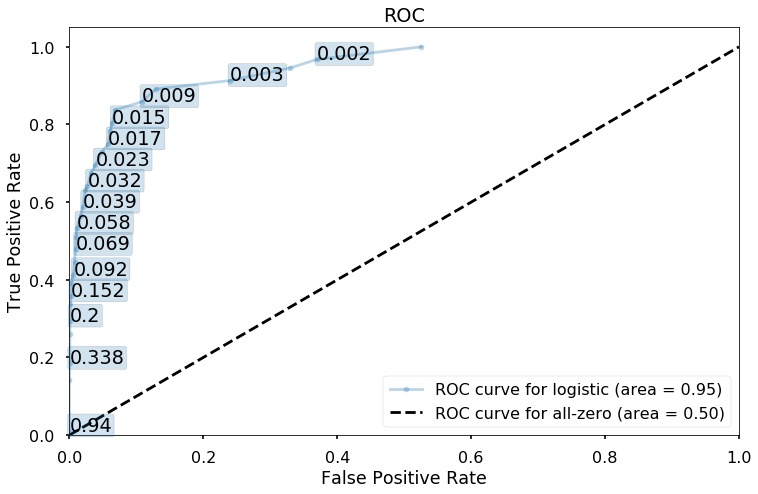

In [10]:
# make_roc function from lab 7
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.1', alpha=0.2,
    )
    if labe!=None:
        for k in range(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 3))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--', label="ROC curve for all-zero (area = 0.50)")
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

sns.set_context("poster")
plt.figure(figsize=(12,7.5))
ax=make_roc("logistic",logit, y_test, X_test, labe=10, skip=5)

## Answer:
### 1. Display the ROC curve for the fitted classifier on the test set. In the same plot, also display the ROC curve for the all 0's classifier. How do the two curves compare?
The ROC curve for logistic is clearly much better than the one for all-zero classifier. We can see the logistic one covers more area, which is almost double of the one for all-zero.

In [11]:
fpr, tpr, thresholds=roc_curve(y_test, logit.predict_proba(X_test)[:,1])
# fpr.shape, tpr.shape, thresholds.shape
print("If FPR=0, the highest TPR is {}, and the threshold is {}"\
      .format(tpr[(np.abs(fpr-0)).argmin()], thresholds[(np.abs(fpr-0)).argmin()]))
print("If FPR=0.1, the highest TPR is {}, and the threshold is {}"\
      .format(tpr[(np.abs(fpr-0.1)).argmin()], thresholds[(np.abs(fpr-0.1)).argmin()]))
print("If FPR=0.5, the highest TPR is {}, and the threshold is {}"\
      .format(tpr[(np.abs(fpr-0.5)).argmin()], thresholds[(np.abs(fpr-0.5)).argmin()]))
print("If FPR=0.9, the highest TPR is {}, and the threshold is {}"\
      .format(tpr[(np.abs(fpr-0.9)).argmin()], thresholds[(np.abs(fpr-0.9)).argmin()]))

If FPR=0, the highest TPR is 0.010869565217391304, and the threshold is 0.939774888515066
If FPR=0.1, the highest TPR is 0.8369565217391305, and the threshold is 0.00954771520768657
If FPR=0.5, the highest TPR is 0.9891304347826086, and the threshold is 0.0008126319315917487
If FPR=0.9, the highest TPR is 1.0, and the threshold is 1.012077352857109e-34


## Answer:
### 2. Compute the highest TPR that can be achieved by the classifier at each of the following FPR's, and the thresholds at which they are achieved. Based on your results, comment on how the threshold influences a classifier's FPR.
- As we decrease the threshold from 1 to 0, the flase positive rate will increase, but we will also get a higher true positive rate. The change in threshold causes a trade-off between FPR and TPR.

## Answer:
### 3. Suppose a clinician told you that diagnosing a cancer patient as normal is twice as critical an error as diagnosing a normal patient as having cancer. Based on this information, what threshold would you recommend the clinician to use? What is the TPR and FPR of the classifier at this threshold?
- Based on the clinician's point of view, a false negative is twice as critical an error as a false positive.
- Therefore, I will recommend trading a higher false positive rate for a higher true positive rate.
- My way to interpret twice is as the follows: Both FPR and non-TPR have some cost, but cost for non-TPR is twice more expensive. Therefore, we want to trade FPR for TPR, and the relation between them is about 2*FPR = 1-TPR.

In [12]:
# print("For threshold=0.01, TPR is {}, and FPR is {}"\
#       .format(tpr[(np.abs(thresholds-0.01)).argmin()], fpr[(np.abs(thresholds-0.01)).argmin()]))
tpr_penalty = [1-x for x in tpr]
fpr_penalty = [x for x in fpr]
dif = []
for i, j in zip(tpr_penalty, fpr_penalty):
    d = abs(i - 2*j)
    dif.append(d)
min_index = dif.index(min(dif))
# print(min_index)
# tpr[min_index], fpr[min_index], thresholds[min_index]
print("For threshold={}, TPR is {}, and FPR is {}"\
       .format(thresholds[min_index], tpr[min_index], fpr[min_index]))

For threshold=0.014140026949153216, TPR is 0.8369565217391305, and FPR is 0.06803235756270733


- From the above calculation, I will recomment a threshold at about 0.014, which gives true positive rate (TPR) at 83.7%, whereas false positive rate (FPR) is at 6.8%.

## Answer:
### 4. Compute the area under the ROC curve (AUC) for both the fitted classifier and the all 0's classifier. How does the difference in the AUCs of the two classifiers compare with the difference between their classification accuracies in Question 1, Part 2(A)?

In [13]:
logit_auc = roc_auc_score(y_test, logit.predict_proba(X_test)[:,1])
print("The area under the ROC curve for the fitted logistic classifier is:", logit_auc)
print("The area under the ROC curve for the all 0's classifier is: 0.5")

The area under the ROC curve for the fitted logistic classifier is: 0.945496560048
The area under the ROC curve for the all 0's classifier is: 0.5


## Question 3: Missing data

In this problem you are given a different data set, `hw6_dataset_missing.csv`, that is  similar to the one you used above (same column definitions and same conditions), however this data set contains missing values. 

*Note*: be careful of reading/treating column names and row names in this data set as well, it *may* be different than the first data set.


1. Remove all observations that contain and missing values, split the dataset into a 75-25 train-test split, and fit the regularized logistic regression as in Question 1 (use `LogisticRegressionCV` again to retune).  Report the overall classification rate and TPR in the test set.
2. Restart with a fresh copy of the data in `hw6_dataset_missing.csv` and impute the missing data via mean imputation.  Split the data 75-25 and fit the regularized logistic regression model.  Report the overall classification rate and TPR in the test set.  
3. Again restart with a fresh copy of the data in `hw6_dataset_missing.csv` and impute the missing data via a model-based imputation method. Once again split the data 75-25 and fit the regularized logistic regression model.  Report the overall classification rate and TPR in the test set.  
4. Compare the results in the 3 previous parts of this problem.  Prepare a paragraph (5-6 sentences) discussing the results, the computational complexity of the methods, and conjecture and explain why you get the results that you see.



In [14]:
df2 = pd.read_csv('HW6_dataset_missing.csv', index_col=0)
df2.shape

(24999, 118)

In [15]:
df2_drop = df2.dropna(axis=0)
df2_drop.shape

(1436, 118)

In [16]:
X2 = df2_drop.iloc[:, :-1]
y2 = df2_drop.iloc[:, -1]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=42)
X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape

((1077, 117), (1077,), (359, 117), (359,))

In [17]:
logit = LogisticRegressionCV(reg_Cs, cv=3) #data size after removing missing values is small; use cv=3 instead
logit.fit(X_train2, y_train2)
print("Logistic regression classifier on test set with missing values removed has accuracy:",\
      logit.score(X_test2, y_test2))
print("Confusion matrix for the fitted logistic regression classifier:")
print(confusion_matrix(y_test2,logit.predict(X_test2)))

Logistic regression classifier on test set with missing values removed has accuracy: 1.0
Confusion matrix for the fitted logistic regression classifier:
[[359]]


## Answer:
### 1. Remove all observations that contain and missing values. Report the overall classification rate and TPR in the test set.
- With missing values removed, the TPR calculated from the above confusion matrix is N/A, because there is no positive case, and hence zero divide by zero is undefined.

In [18]:
df3 = df2.copy()
for col in df3:
    df3[col] = df2[col].fillna(df2[col].mean())
df3.shape

(24999, 118)

In [19]:
X3 = df3.iloc[:, :-1]
y3 = df3.iloc[:, -1]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25, random_state=42)
X_train3.shape, y_train3.shape, X_test3.shape, y_test3.shape

((18749, 117), (18749,), (6250, 117), (6250,))

In [20]:
logit = LogisticRegressionCV(reg_Cs, cv=5)
logit.fit(X_train3, y_train3)
print("Logistic regression classifier on test set with missing values imputed has accuracy:",\
      logit.score(X_test3, y_test3))
print("Confusion matrix for the fitted logistic regression classifier:")
print(confusion_matrix(y_test3,logit.predict(X_test3)))

Logistic regression classifier on test set with missing values imputed has accuracy: 0.99488
Confusion matrix for the fitted logistic regression classifier:
[[6212    1]
 [  31    6]]


## Answer:
### 2. Restart with a fresh copy and impute the missing data via mean imputation. Report the overall classification rate and TPR in the test set.
- TPR = $\frac{TP}{TP+FN} = \frac{6}{6+31} = 16.22\%$

In [21]:
df4 = df2.copy()
nan_cols = df4.columns[df4.isnull().any()].tolist()
print("columns that have missing values are: ", nan_cols)
# df4.isnull().sum()
# df4.head()

columns that have missing values are:  ['93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109']


In [22]:
# indices = df4['93'].index[df4['93'].apply(np.isnan)].tolist()
# indices[0]
# df4.iloc[8,92]
# np.isnan(df4.iloc[8,92])
# inds = df4['93'].index[df4['93'].apply(np.isnan)]

In [23]:
# use knn with k=5
# randomly select from the nearest next 5 neighbors with equal probability
# Run this method three times till no more nan values
for t in range(3):
    for j in nan_cols:
        inds = df4[j].index[df4[j].apply(np.isnan)].tolist()
        j_int = int(j)-1
        for i in inds:
            if i+6 >= df4.shape[0]:
                df4.iloc[i,j_int] = df4.iloc[0,j_int]
            else:
                random_number = np.random.random()
                if random_number < 0.2:
                    if not np.isnan(df4.iloc[i+1, j_int]):
                        df4.iloc[i, j_int] = df4.iloc[i+1, j_int]
                    else:
                        df4.iloc[i, j_int] = df4.iloc[i+2, j_int]
                elif random_number >= 0.2 and random_number < 0.4:
                    if not np.isnan(df4.iloc[i+2, j_int]):
                        df4.iloc[i,j_int] = df4.iloc[i+2, j_int]
                    else:
                        df4.iloc[i, j_int] = df4.iloc[i+3, j_int]
                elif random_number >= 0.4 and random_number < 0.6:
                    if not np.isnan(df4.iloc[i+3, j_int]):
                        df4.iloc[i,j_int] = df4.iloc[i+3, j_int]
                    else:
                        df4.iloc[i, j_int] = df4.iloc[i+4, j_int]
                elif random_number >= 0.6 and random_number < 0.8:
                    if not np.isnan(df4.iloc[i+4, j_int]):
                        df4.iloc[i,j_int] = df4.iloc[i+4, j_int]
                    else:
                        df4.iloc[i, j_int] = df4.iloc[i+5, j_int]
                elif random_number >= 0.8:
                    if not np.isnan(df4.iloc[i+5, j_int]):
                        df4.iloc[i,j_int] = df4.iloc[i+5, j_int] 
                    else:
                        df4.iloc[i, j_int] = df4.iloc[i+6, j_int]

# check if there is any more nan values: want to see an empty list
df4.columns[df4.isnull().any()].tolist()


[]

In [24]:
# df4.isnull().sum()

In [25]:
X4 = df4.iloc[:, :-1]
y4 = df4.iloc[:, -1]
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.25, random_state=42)
X_train4.shape, y_train4.shape, X_test4.shape, y_test4.shape

((18749, 117), (18749,), (6250, 117), (6250,))

In [26]:
logit = LogisticRegressionCV(reg_Cs, cv=5)
logit.fit(X_train4, y_train4)
print("Logistic regression classifier on test set with missing values using knn model imputation has accuracy:",\
      logit.score(X_test4, y_test4))
print("Confusion matrix for the fitted logistic regression classifier:")
print(confusion_matrix(y_test4,logit.predict(X_test4)))

Logistic regression classifier on test set with missing values using knn model imputation has accuracy: 0.99504
Confusion matrix for the fitted logistic regression classifier:
[[6211    2]
 [  29    8]]


## Answer:
### 3. Again restart with a fresh copy and impute the missing data via a model-based imputation method. Report the overall classification rate and TPR in the test set.
- TPR = $\frac{TP}{TP+FN} = \frac{8}{8+29} = 21.62\%$

## Answer:
### 4. Compare the results in the 3 previous parts of this problem. Prepare a paragraph (5-6 sentences) discussing the results, the computational complexity of the methods, and conjecture and explain why you get the results that you see.
With missing values present in the dataset, we tried 3 methods: removing missing values, mean imputation and model-based (I chose knn model with k=5) imputation. In this problem, it is not a good idea to completely remove missing values, because doing this will significantly shrink the size of the dataset, and we can see then we have no more observations with patient who have breast cancer, and hence we cannot get any TPR information. Comparing the TPR in the test set, we can see that model-based imputation gives the highest true positive rate. This is because using model-based imputation plus some uncertainty, the value imputed will be more likely to represent real data. However, the computational complexity of the model-based imputation is much greater than the other two, and the TPR result is not that much higher than simple mean imputation. Therefore, I prefer use mean imputation in this problem than the other two methods.

## APCOMP209a - Homework Question


This problem walks you through the derivation of the **likelihood equations** for a generalized linear model (GLM). Suppose that the random component of the GLM is in the univariate natural exponential family, so that
$$f(y_i|\theta_i) = h(y_i) e^{y_i\theta_i - b(\theta_i)}$$
Define the individual log-likelihood for each observation $i$ as
$$l_i(\theta_i) \equiv \log f(y_i|\theta_i)$$
with linear predictor
$$\eta_i = x_i^T\beta = g(\mu_i)$$
for some link function $g$ and where $\mu_i=E(Y_i)$.

1. Use the above expressions to write a simplified expression for the log-likelihood $l(\theta)$ for the entire dataset, $y_1, \dots, y_n$.

2. Use the chain rule to express $\frac{\partial l_i}{\partial \beta_j}$ in terms of the derivatives of $l_i, \theta_i, \mu_i$, and $\eta_i$. (*Hint*: Think carefully about which variables are related to which, and in what way. For example, for which of the above variables do you know the derivative with respect to $\beta_j$?)

3. Compute the derivatives for $\frac{\partial l_i}{\partial \theta_i}$ and $\frac{\partial \eta_i}{\partial \beta_j}$.

4. Express $\mu_i$ in terms of $\theta_i$, and use this relationship to compute $\frac{\partial \theta_i}{\partial \mu_i}$. (\emph{Hint}: Recall the cumulant function of a natural exponential family, and assume that you can write $\partial f/\partial g = (\partial g / \partial f)^{-1}$.)

5. Express $\eta_i$ in terms of $\mu_i$. Using the same hint as the above, compute $\frac{\partial \mu_i}{\partial \eta_i}$.

6. Put all of the above parts together to write an expression for $\frac{\partial l}{\partial \beta_j}$. Use matrix notation to write this expression as
$$\nabla_{\beta} l(\beta) = XDV^{-1}(Y - \mu) = 0$$
That is, compute the matrices $D$ and $V$ such that this equation holds.

7. If we use the canonical link function, how do your answers to part (6) simplify?

8. Finally, compute the above likelihood equations in the case of logistic regression, and show that this is equivalent to the solution given in lecture.


## Answer:
### 1. Use the above expressions to write a simplified expression for the log-likelihood $l(\theta)$ for the entire dataset, $y_1, \dots, y_n$.

$l(\theta) = \sum_{i=1}^{n}l_i (\theta_i)
= \sum_{i=1}^{n}log(h(y_i)) + \sum_{i=1}^{n}[y_i \theta_i - b(\theta_i)]$

### 2. . Use the chain rule to express $\frac{\partial l_i}{\partial \beta_j}$ in terms of the derivatives of $l_i, \theta_i, \mu_i$, and $\eta_i$. (*Hint*: Think carefully about which variables are related to which, and in what way. For example, for which of the above variables do you know the derivative with respect to $\beta_j$?)

$\frac{\partial l_i}{\partial \beta_j}$ = $\frac{\partial l_i}{\partial \theta_i} \cdot
\frac{\partial \theta_i}{\partial \mu_i} \cdot
\frac{\partial \mu_i}{\partial \eta_i} \cdot
\frac{\partial \eta_i}{\partial \beta_j}
$

### 3. Compute the derivatives for $\frac{\partial l_i}{\partial \theta_i}$ and $\frac{\partial \eta_i}{\partial \beta_j}$.

$\frac{\partial l_i}{\partial \theta_i} = y_i - b'(\theta_i) = y_i - \mu_i$

Since $\eta_i = x_i^T\beta = \beta_1 x_{i1} + \dots + \beta_p x_{ip}$, we get: $\frac{\partial \eta_i}{\partial \beta_j} = x_{ij}$

### 4. Express $\mu_i$ in terms of $\theta_i$, and use this relationship to compute $\frac{\partial \theta_i}{\partial \mu_i}$. (Hint: Recall the cumulant function of a natural exponential family, and assume that you can write $\partial f/\partial g = (\partial g / \partial f)^{-1}$.)

$\mu_i = b'(\theta_i)$

$\frac{\partial \theta_i}{\partial \mu_i} = (\frac{\partial \mu_i}{\partial \theta_i})^{-1}
= b''(\theta_i)^{-1} = (Var(y_i|\theta_i))^{-1} = \frac{1}{Var(y_i|\theta_i)}
$

### 5. Express $\eta_i$ in terms of $\mu_i$. Using the same hint as the above, compute $\frac{\partial \mu_i}{\partial \eta_i}$.

$\eta_i = g(\mu_i)$

$\frac{\partial \mu_i}{\partial \eta_i} = (\frac{\partial \eta_i}{\partial \mu_i})^{-1}
= g'(\mu_i)^{-1} = \frac{1}{g'(\mu_i)}
$

### 6. Put all of the above parts together to write an expression for $\frac{\partial l}{\partial \beta_j}$. Use matrix notation to write this expression as
$$\nabla_{\beta} l(\beta) = XDV^{-1}(Y - \mu) = 0$$
That is, compute the matrices $D$ and $V$ such that this equation holds.

$\frac{\partial l_i}{\partial \beta_j} = \frac{\partial l_i}{\partial \theta_i} \cdot
\frac{\partial \theta_i}{\partial \mu_i} \cdot
\frac{\partial \mu_i}{\partial \eta_i} \cdot
\frac{\partial \eta_i}{\partial \beta_j}
= (y_i - \mu_i) \cdot \frac{1}{Var(y_i|\theta_i)} \cdot \frac{1}{g'(\mu_i)} \cdot x_{ij}
$

$\frac{\partial l}{\partial \beta_j}
= \sum_{i=1}^{n}(y_i - \mu_i) \cdot \frac{1}{Var(y_i|\theta_i)} \cdot \frac{1}{g'(\mu_i)} \cdot x_{ij}
$

In matrix form, y and $\mu$ are column vectors, and X is the data matrix.

If we write this expression using matrix notation as $\nabla_{\beta} l(\beta) = XDV^{-1}(Y - \mu) = 0$, we will get the following matrices $D$ and $V^{-1}$:

$D = 
\begin{bmatrix}
g'(\mu_1)^{-1} & 0 & \cdots & 0 \\
0 & g'(\mu_2)^{-1} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & g'(\mu_n)^{-1}
\end{bmatrix}
$

$V =
\begin{bmatrix}
Var(y_1|\theta_1) & 0 & \cdots & 0 \\
0 & Var(y_2|\theta_2) & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & Var(y_n|\theta_n)
\end{bmatrix}
$

Note that $V^{-1}$ is just:
$V^{-1}=
\begin{bmatrix}
\frac{1}{Var(y_1|\theta_1)} & 0 & \cdots & 0 \\
0 & \frac{1}{Var(y_2|\theta_2)} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \frac{1}{Var(y_n|\theta_n)}
\end{bmatrix}
$
in the previous equation.


### 7. If we use the canonical link function, how do your answers to part (6) simplify?

Canonical link: $\theta = \eta$

Therefore, we have $\frac{\partial \theta_i}{\partial \mu_i} \cdot \frac{\partial \mu_i}{\partial \eta_i} = 1$

The answer to part (6) can be simplified as $\nabla_{\beta} l(\beta) = X(Y - \mu) = 0$

### 8. Finally, compute the above likelihood equations in the case of logistic regression, and show that this is equivalent to the solution given in lecture.